# MSDS OOP With Python
## Assignment 3
### Advent 2025

Author: Jonathan Stephen KATEEGA\
Access No: B34976

## Question 1
Create a class hierarchy that models vehicles registered in Uganda.

Attempt the following tasks:

1.1. Create a parent class Vehicle with attributes: plate_number, owner, engine_cc, base_tax.

In [1]:
class Vehicle:
    
    """A class to represent a vehicle."""
    
    def __init__(self, plate_number, owner, engine_cc, base_tax):
        self.plate_number = plate_number
        self.owner = owner
        self.engine_cc = engine_cc
        self.base_tax = base_tax

    def calculate_tax(self):
        """Base method (intended to be overridden by subclasses)."""
        return self.base_tax

    def to_dict(self):
        """Return vehicle details as a dictionary."""
        return {
            "type": self.__class__.__name__,
            "plate_number": self.plate_number,
            "owner": self.owner,
            "engine_cc": self.engine_cc,
            "base_tax": self.base_tax,
            "calculated_tax": self.calculate_tax()
        }

1.2. Create subclasses:
- Car – adds passenger_capacity.
- Truck – adds load_capacity.
- Motorbike – adds type (e.g., boda, private).

1.3. Implement a method calculate_tax():
- Cars: base_tax + (engine_cc × 0.05)
- Trucks: base_tax + (load_capacity × 0.1)
- Motorbikes: base_tax + 20,000

In [2]:
class Car(Vehicle):
    def __init__(self, plate_number, owner, engine_cc, base_tax, passenger_capacity):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.passenger_capacity = passenger_capacity

    def calculate_tax(self):
        # Cars: base_tax + (engine_cc × 0.05)
        return self.base_tax + (self.engine_cc * 0.05)

    def to_dict(self):
        data = super().to_dict()
        data["passenger_capacity"] = self.passenger_capacity
        return data


class Truck(Vehicle):
    def __init__(self, plate_number, owner, engine_cc, base_tax, load_capacity):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.load_capacity = load_capacity

    def calculate_tax(self):
        # Trucks: base_tax + (load_capacity × 0.1)
        return self.base_tax + (self.load_capacity * 0.1)

    def to_dict(self):
        data = super().to_dict()
        data["load_capacity"] = self.load_capacity
        return data


class Motorbike(Vehicle):
    def __init__(self, plate_number, owner, engine_cc, base_tax, type_):
        super().__init__(plate_number, owner, engine_cc, base_tax)
        self.type_ = type_

    def calculate_tax(self):
        # Motorbikes: base_tax + 20,000
        return self.base_tax + 20000

    def to_dict(self):
        data = super().to_dict()
        data["type"] = self.type_
        return data

1.4. Demonstrate polymorphism by calling calculate_tax() for all types.

1.5. Save all records to a JSON file named vehicle_registry.json.

In [3]:
# importing json package
import json

if __name__ == "__main__":
    vehicles = [
        Car("UAX123A", "Jonathan Kateega", 2000, 50000, 5),
        Truck("UBD456B", "Mary Nansubuga", 4000, 80000, 12000),
        Motorbike("UEX789C", "Peter Okello", 150, 30000, "boda")
    ]

    print("Vehicle Tax Calculations")
    for v in vehicles:
        print(f"{v.__class__.__name__} ({v.plate_number}) - Tax: {v.calculate_tax():,.0f} UGX")
        
    # saving all records to JSON
    vehicle_data = [v.to_dict() for v in vehicles]
    with open("vehicle_registry.json", "w") as f:
        json.dump(vehicle_data, f, indent=4)

    print("\nVehicle records saved to vehicle_registry.json")

Vehicle Tax Calculations
Car (UAX123A) - Tax: 50,100 UGX
Truck (UBD456B) - Tax: 81,200 UGX
Motorbike (UEX789C) - Tax: 50,000 UGX

Vehicle records saved to vehicle_registry.json


## Question 2
Model a SACCO (Savings and Credit Cooperative) that evaluates members for loan approval.

Attempt the following tasks:

2.1. Create an abstract base class Member with: name, id_no, savings_balance.

2.4. Add static method get_exchange_rate() that retrieves USD rate using requests.get().

2.5. Display equivalent loan eligibility in UGX and USD.

2.6. Include exception handling for network/JSON errors.

In [4]:
# Importing packages

from abc import ABC, abstractmethod
import requests

In [5]:
# Creating an abstract class "Member"

class Member(ABC):
    def __init__(self, name, id_no, savings_balance):
        self.name = name
        self.id_no = id_no
        self.savings_balance = savings_balance

    @abstractmethod
    def loan_eligibility(self):
        """Compute the maximum loan a member can receive."""
        pass
    
    # A static method to retrieve the USD exchange rate
    # Includes exception handling for network errors
    @staticmethod
    def get_exchange_rate():
        """
        Retrieves the USD exchange rate from an online API.
        Includes exception handling for network or JSON errors.
        """
        try:
            response = requests.get("https://api.exchangerate-api.com/v4/latest/UGX", timeout=5)
            response.raise_for_status()  # Raises an HTTPError if the response was unsuccessful
            data = response.json()
            usd_rate = data["rates"]["USD"]
            return usd_rate
        except requests.exceptions.RequestException as e:
            print(f"Network error: {e}")
            return None
        except (KeyError, ValueError) as e:
            print(f"Error processing exchange rate data: {e}")
            return None

2.2. Create subclasses:
- FarmerMember
- TraderMember

2.3. Implement loan_eligibility():
- Trader: 4 × savings balance
- Farmer: 6 × savings balance

In [6]:
# Creating Sub-Classes for "FarmerMember" and "TraderMember"

class FarmerMember(Member):
    def loan_eligibility(self):
        # Farmer loan eligibility: 6 × savings balance
        return self.savings_balance * 6


class TraderMember(Member):
    def loan_eligibility(self):
        # Trader loan eligibility: 4 × savings balance
        return self.savings_balance * 4

In [7]:
# Sample usage

if __name__ == "__main__":
    # Create sample members
    members = [
        FarmerMember("John Okello", "FM123", 1_000_000),
        TraderMember("Sarah Namatovu", "TM456", 2_000_000),
    ]

    print("SACCO Loan Eligibility\n")

    # Fetch USD exchange rate once
    usd_rate = Member.get_exchange_rate()

    for m in members:
        ugx_eligibility = m.loan_eligibility()
        if usd_rate:
            usd_eligibility = ugx_eligibility * usd_rate
            print(f"Member: {m.name} ({m.__class__.__name__})")
            print(f" - Savings Balance: {m.savings_balance:,.0f} UGX")
            print(f" - Loan Eligibility: {ugx_eligibility:,.0f} UGX ({usd_eligibility:,.2f} USD)\n")
        else:
            print(f"Member: {m.name} ({m.__class__.__name__})")
            print(f" - Savings Balance: {m.savings_balance:,.0f} UGX")
            print(f" - Loan Eligibility: {ugx_eligibility:,.0f} UGX")
            print(" - Exchange rate unavailable.\n")

SACCO Loan Eligibility

Member: John Okello (FarmerMember)
 - Savings Balance: 1,000,000 UGX
 - Loan Eligibility: 6,000,000 UGX (1,740.00 USD)

Member: Sarah Namatovu (TraderMember)
 - Savings Balance: 2,000,000 UGX
 - Loan Eligibility: 8,000,000 UGX (2,320.00 USD)



## Question 3
3. Design a system that models traffic light management.

Attempt the following tasks

3.1. Base class TrafficLight with turn_green(), turn_red(), and status().

3.3. Demonstrate encapsulation using private attribute __current_state.

In [8]:
# Importing packages

import random
import time
from datetime import datetime

In [9]:
# Base class, demosntrating encapsulation using private attribute __current_state

class TrafficLight:
    def __init__(self, location):
        self.location = location
        self.__current_state = "RED"  # 3.3 Encapsulation: private attribute

    def turn_green(self):
        """Switch to GREEN."""
        self.__current_state = "GREEN"

    def turn_red(self):
        """Switch to RED."""
        self.__current_state = "RED"

    def status(self):
        """Return current state."""
        return self.__current_state

3.2. Subclass SmartTrafficLight that:
- Connects to a simulated sensor API returning car density.
- Adjusts green/red duration based on car count.

In [10]:
# Subclass with simulated sensor API

class SmartTrafficLight(TrafficLight):
    def __init__(self, location):
        super().__init__(location)

    def get_car_density(self):
        """
        Simulated sensor API — returns random car count (0–100).
        """
        return random.randint(0, 100)

    def adjust_durations(self):
        """
        Adjust durations based on car density.
        More cars → longer green light.
        """
        car_count = self.get_car_density()

        if car_count < 30:
            green_duration = 30
            red_duration = 60
        elif 30 <= car_count < 70:
            green_duration = 45
            red_duration = 45
        else:
            green_duration = 60
            red_duration = 30

        return car_count, green_duration, red_duration

    def run_cycle(self, cycles=3):
        """
        Runs several light cycles, waiting real-time between changes.
        """
        for i in range(cycles):
            car_count, green, red = self.adjust_durations()

            # --- GREEN light phase ---
            self.turn_green()
            timestamp = datetime.now().strftime("%H:%M:%S")
            print(f"[{timestamp}] {self.location}: GREEN for {green}s (cars detected: {car_count})")
            time.sleep(green)

            # --- RED light phase ---
            self.turn_red()
            timestamp = datetime.now().strftime("%H:%M:%S")
            print(f"[{timestamp}] {self.location}: RED for {red}s")
            time.sleep(red)

            print("-" * 60)

3.4 Simulate multiple cycles printing logs like:\
[09:15] Jinja Road: Green for 60s, Red for 30s.

In [11]:
# Simulation

if __name__ == "__main__":
    print("Traffic Light Simulation\n")

    jinja_light = SmartTrafficLight("Jinja Road")
    kampala_light = SmartTrafficLight("Kampala Road")

    # Run both intersections in sequence (each runs for 2 cycles)
    jinja_light.run_cycle(cycles=2)
    kampala_light.run_cycle(cycles=2)

Traffic Light Simulation

[22:24:18] Jinja Road: GREEN for 45s (cars detected: 55)
[22:25:03] Jinja Road: RED for 45s
------------------------------------------------------------
[22:25:48] Jinja Road: GREEN for 30s (cars detected: 3)
[22:26:18] Jinja Road: RED for 60s
------------------------------------------------------------
[22:27:18] Kampala Road: GREEN for 45s (cars detected: 67)
[22:28:03] Kampala Road: RED for 45s
------------------------------------------------------------
[22:28:48] Kampala Road: GREEN for 30s (cars detected: 11)
[22:29:18] Kampala Road: RED for 60s
------------------------------------------------------------


## Question 4
Build a student grading system.

Requirements:

4.1. Base class Student with: student_id, name, marks (dictionary of subjects).

4.2. Methods:
- Compute total and average marks.
- Return grade (A ≥80, B ≥70, etc.).

In [12]:
# Base class for "Student"

class Student:
    def __init__(self, student_id, name, marks):
        """
        marks: dictionary {subject: score}
        """
        self.student_id = student_id
        self.name = name
        self.marks = marks

    # Methods
    def compute_total(self):
        return sum(self.marks.values())

    def compute_average(self):
        return self.compute_total() / len(self.marks) if self.marks else 0

    def get_grade(self):
        avg = self.compute_average()
        if avg >= 80:
            return "A"
        elif avg >= 70:
            return "B"
        elif avg >= 60:
            return "C"
        elif avg >= 50:
            return "D"
        else:
            return "F"

    def to_dict(self):
        """Convert student data to a dictionary for JSON export."""
        return {
            "type": self.__class__.__name__,
            "student_id": self.student_id,
            "name": self.name,
            "marks": self.marks,
            "total": self.compute_total(),
            "average": round(self.compute_average(), 2),
            "grade": self.get_grade()
        }

    def display_evaluation(self):
        """Polymorphic method to display evaluation (coursework or thesis)."""
        print(f"{self.name} ({self.__class__.__name__})")
        print(f"  Total Marks: {self.compute_total()} | Average: {self.compute_average():.2f}")
        print(f"  Grade: {self.get_grade()}\n")

4.3. Subclass PostgraduateStudent adds research_topic and evaluate_thesis() returning 'Pass' or 'Revise'.

In [13]:
# Sub-class for "PostgraduateStudent"

class PostgraduateStudent(Student):
    def __init__(self, student_id, name, marks, research_topic):
        super().__init__(student_id, name, marks)
        self.research_topic = research_topic

    def evaluate_thesis(self):
        """
        Randomly returns 'Pass' or 'Revise' to simulate evaluation.
        Could be replaced with real assessment logic.
        """
        return random.choice(["Pass", "Revise"])

    def to_dict(self):
        data = super().to_dict()
        data["research_topic"] = self.research_topic
        data["thesis_result"] = self.evaluate_thesis()
        return data

    # Polymorphic override
    def display_evaluation(self):
        thesis_result = self.evaluate_thesis()
        print(f"{self.name} ({self.__class__.__name__})")
        print(f"  Total Marks: {self.compute_total()} | Average: {self.compute_average():.2f}")
        print(f"  Grade: {self.get_grade()} | Thesis: {thesis_result}")
        print(f"  Research Topic: {self.research_topic}\n")

4.4. Save and load data to/from JSON.

In [14]:
# save to JSON
def save_students_to_json(students, filename="students.json"):
    data = [s.to_dict() for s in students]
    with open(filename, "w") as f:
        json.dump(data, f, indent=4)
    print(f"Data saved to {filename}")
    
# load from JSON
def load_students_from_json(filename="students.json"):
    with open(filename, "r") as f:
        data = json.load(f)
    print(f"Loaded {len(data)} student records from {filename}")
    return data

4.5. Use polymorphism to display coursework and thesis evaluations together.

In [15]:
# Displaying results

if __name__ == "__main__":
    print("Student Grading System\n")

    # Create sample students
    s1 = Student("UG001", "Alice Namatovu", {"Math": 85, "English": 78, "Science": 90})
    s2 = Student("UG002", "Brian Ouma", {"Math": 65, "English": 58, "Science": 62})
    s3 = PostgraduateStudent("PG101", "Catherine Ayo", {"Research Methods": 88, "Statistics": 82}, "Multi-modal Sentiment Analysis")

    # Polymorphism (using one loop to handle both undergraduate & postgraduate)
    students = [s1, s2, s3]
    for s in students:
        s.display_evaluation()

    # Save and load data
    save_students_to_json(students)
    loaded_data = load_students_from_json()

    print("\nLoaded Data Preview")
    for record in loaded_data:
        print(f"{record['name']} ({record['type']}): Grade {record['grade']}")

Student Grading System

Alice Namatovu (Student)
  Total Marks: 253 | Average: 84.33
  Grade: A

Brian Ouma (Student)
  Total Marks: 185 | Average: 61.67
  Grade: C

Catherine Ayo (PostgraduateStudent)
  Total Marks: 170 | Average: 85.00
  Grade: A | Thesis: Pass
  Research Topic: Multi-modal Sentiment Analysis

Data saved to students.json
Loaded 3 student records from students.json

Loaded Data Preview
Alice Namatovu (Student): Grade A
Brian Ouma (Student): Grade C
Catherine Ayo (PostgraduateStudent): Grade A


## Question 5

Using the Spotify API (spotipy) or a mock JSON file of Ugandan artists:

Attempt the following tasks:

In [16]:
# Spotipy! (https://spotipy.readthedocs.io/en/2.19.0/)
# Should let us access spotify data via python

# try:
#     import spotipy
#     from spotipy.oauth2 import SpotifyClientCredentials
# except ImportError:
#     spotipy = None
#     print("spotipy not installed; using mock JSON data.")

# Failed, skipping for now

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

5.1. Create a class UgandaMusicAnalytics with methods to fetch top tracks of Ugandan artists (eg. Azawi, Sheebah etc.).

In [18]:
# Base class for "UgandaMusicAnalytics"

class UgandaMusicAnalytics:
    def __init__(self, mock_file="ugandan_artists.json"):
        """
        Initialize with a mock JSON file containing Ugandan artists and their tracks.
        """
        self.mock_file = mock_file
        self.track_data = []

    def fetch_tracks(self):
        """Fetch top tracks from the mock JSON file."""
        try:
            with open(self.mock_file, "r") as f:
                self.track_data = json.load(f)
            print(f"Loaded {len(self.track_data)} tracks from {self.mock_file}")
        except FileNotFoundError:
            print(f"Mock file '{self.mock_file}' not found.")
            self.track_data = []
        except json.JSONDecodeError:
            print(f"Error decoding JSON in '{self.mock_file}'")
            self.track_data = []
    
    # (5.2) Creating Pandas DataFrame

    def to_dataframe(self):
        df = pd.DataFrame(self.track_data)
        if df.empty:
            print("No track data available.")
        else:
            # Keep only relevant columns
            df = df[["artist", "track_name", "play_count", "popularity", "country"]]
        return df
    
    # (5.3) plot popularity
    
    def plot_popularity(self, df):
        if df.empty:
            print("⚠ Cannot plot empty DataFrame.")
            return
        plt.figure(figsize=(10, 6))
        sns.barplot(x="track_name", y="popularity", hue="artist", data=df)
        plt.xticks(rotation=45)
        plt.title("Ugandan Tracks Popularity")
        plt.ylabel("Popularity")
        plt.xlabel("Track Name")
        plt.tight_layout()
        plt.show()
        
    # Save results to a JSON file.

    def save_to_json(self, filename="ugandan_tracks_output.json"):
        try:
            with open(filename, "w") as f:
                json.dump(self.track_data, f, indent=4)
            print(f"Track data saved to {filename}")
        except Exception as e:
            print(f"Error saving JSON: {e}")
    
    

5.2. Use pandas to create a DataFrame of track names, play counts, and popularity.

5.3. Plot a Seaborn bar chart showing track popularity.

5.4. Save results to a JSON file.

5.6. Create a subclass LocalArtistAnalytics that filters tracks produced in Uganda only.

In [19]:
# Subclass for local Ugandan tracks

class LocalArtistAnalytics(UgandaMusicAnalytics):
    def filter_local_tracks(self):
        """Keep only tracks produced in Uganda."""
        self.track_data = [t for t in self.track_data if t.get("country") == "UG"]
        print(f"Filtered to {len(self.track_data)} local Ugandan tracks")

Loaded 5 tracks from ugandan_artists.json

All Tracks
           artist  track_name  play_count  popularity country
0           Azawi   Quinamino      100000          85      UG
1         Sheebah    Enyenene       95000          80      UG
2     Fik Fameica      Kutama       90000          75      UG
3           Azawi     Nakyuka       85000          78      UG
4  Foreign Artist  Global Hit      200000          90      US


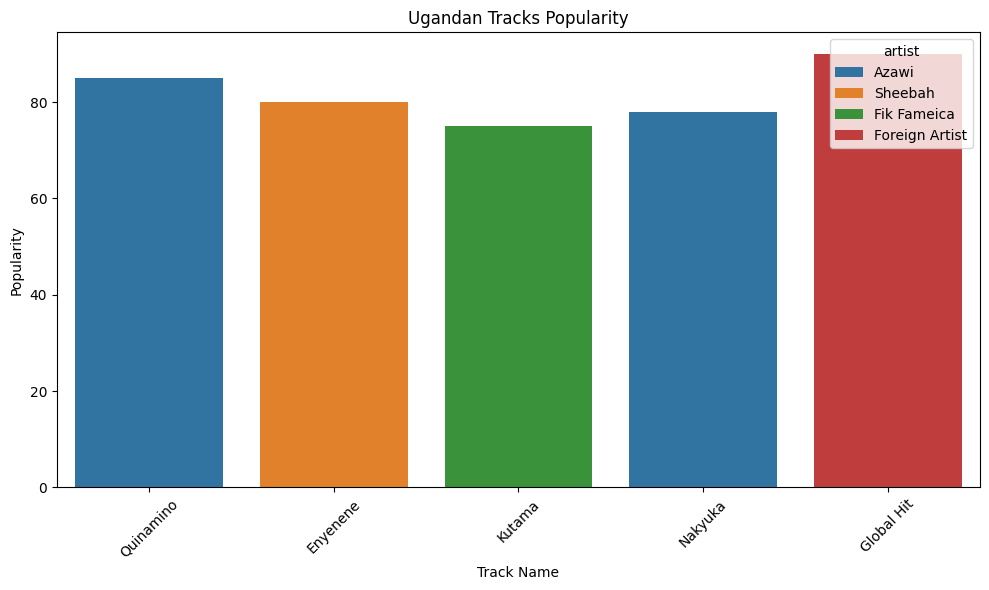

Track data saved to ugandan_tracks_all.json
Loaded 5 tracks from ugandan_artists.json
Filtered to 4 local Ugandan tracks

Local Ugandan Tracks
        artist track_name  play_count  popularity country
0        Azawi  Quinamino      100000          85      UG
1      Sheebah   Enyenene       95000          80      UG
2  Fik Fameica     Kutama       90000          75      UG
3        Azawi    Nakyuka       85000          78      UG


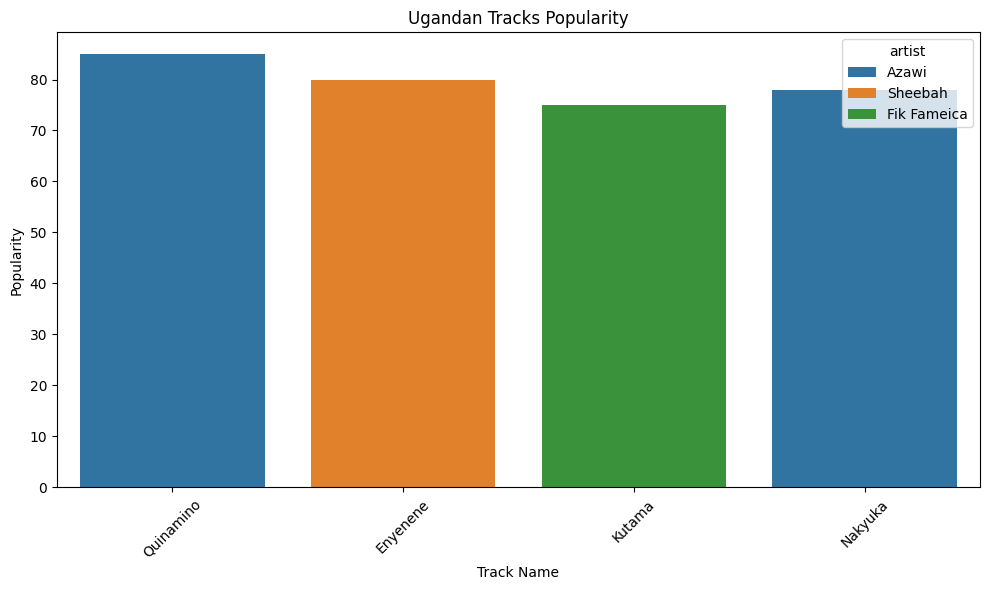

Track data saved to ugandan_tracks_local.json


In [20]:
if __name__ == "__main__":
    
    # Create a mock JSON file for testing
    mock_data = [
        {"artist": "Azawi", "track_name": "Quinamino", "popularity": 85, "play_count": 100000, "country": "UG"},
        {"artist": "Sheebah", "track_name": "Enyenene", "popularity": 80, "play_count": 95000, "country": "UG"},
        {"artist": "Fik Fameica", "track_name": "Kutama", "popularity": 75, "play_count": 90000, "country": "UG"},
        {"artist": "Azawi", "track_name": "Nakyuka", "popularity": 78, "play_count": 85000, "country": "UG"},
        {"artist": "Foreign Artist", "track_name": "Global Hit", "popularity": 90, "play_count": 200000, "country": "US"}
    ]
    with open("ugandan_artists.json", "w") as f:
        json.dump(mock_data, f, indent=4)

    # Create analytics object
    analytics = UgandaMusicAnalytics()
    analytics.fetch_tracks()
    df = analytics.to_dataframe()
    print("\nAll Tracks")
    print(df)

    analytics.plot_popularity(df)
    analytics.save_to_json("ugandan_tracks_all.json")

    # Test subclass
    local_analytics = LocalArtistAnalytics()
    local_analytics.fetch_tracks()
    local_analytics.filter_local_tracks()
    df_local = local_analytics.to_dataframe()
    print("\nLocal Ugandan Tracks")
    print(df_local)

    local_analytics.plot_popularity(df_local)
    local_analytics.save_to_json("ugandan_tracks_local.json")

## Question 6

The Bank of Uganda provides JSON-based daily exchange rate data (try to locate this online) for
USD, GBP, and EUR.

Attempt the following tasks:

6.1. Write a class ExchangeRatePipeline that fetches or loads data from local exchange_rates.json.